In [8]:
import numpy
import math
from scipy import stats
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
GZ_file = fits.open("MaNGA_gz-v1_0_1.fits", memmap=True)
GZ_table = Table(GZ_file[1].data)

In [10]:
MaNGAid_sample = ['1-23891', '1-24018', '1-24148', '1-115401', '1-339028', '1-378148', '1-338677', '1-338746', '1-338220', '1-137853', '1-567187', '1-47862', '1-259117', '1-46757', '1-156061', '1-167555', '1-147521', '1-172948', '1-235530', '1-235587', '1-94228', '1-94027', '1-94029', '1-247430', '1-619066', '1-210962', '1-248289', '1-569216', '1-561039', '1-546816', '1-22412', '1-594528', '1-594602', '1-95093', '1-24295', '1-24418', '1-177528', '1-178824', '1-38543', '1-201314', '1-548190', '1-166646', '1-217520', '1-48223', '1-167334', '1-351919', '1-256210', '1-491047', '1-121697', '1-378526', '1-379741', '1-379708', '1-218412', '1-148954', '1-173898', '1-298868', '1-247661', '1-547341', '1-121209', '1-72350', '1-412544', '1-72211', '1-386302', '1-576182', '1-149471', '1-556831', '1-153103', '1-174947', '1-422969', '1-456708', '1-418071', '1-418228', '1-148987', '1-605482', '1-389238', '1-213603', '1-415939', '1-376429', '1-265801', '1-197280', '1-246542', '1-595146', '1-575232', '1-42862', '1-42230', '1-42195', '1-145791', '1-481320', '1-481779', '1-201969', '1-299684', '1-299468', '1-60689', '1-296414', '1-633819', '1-295446', '1-318128']

MaNGAid_control_1 = ['12-180432', '12-129618', '1-114500', '1-338796', '1-43702', '1-604937', '1-138087', '1-47136', '1-259195', '1-47291', '1-605884', '1-542392', '1-134599', '1-321962', '1-235398', '1-134954', '1-402649', '1-419536', '1-211063', '1-23784', '1-210881', '1-236776', '1-22662', '1-569116', '1-96077', '1-135641', '1-24440', '1-351566', '1-36832', '1-37213', '1-38541', '1-145884', '1-164153', '1-71974', '1-109378', '1-548157', '1-488790', '1-491218', '1-379571', '1-460862', '1-460288', '1-379277', '1-245404', '1-246470', '1-392007', '1-135093', '1-91016', '1-457811', '1-24161', '1-269085', '1-25740', '1-603039', '1-38029', '1-72203', '1-606955', '1-389479', '1-277300', '1-605075', '1-218233', '1-385070', '1-149556', '1-188218', '1-456306', '1-37400', '1-229673', '1-556805', '1-387155', '1-175169', '1-175185', '1-627397', '1-458396', '1-149610', '1-614392', '1-605353', '1-615921', '1-247758', '1-316920', '1-603309', '1-581847', '1-229796', '1-403958', '1-474575', '1-585668', '1-77704', '1-78627', '1-78665', '1-299674', '1-605611', '1-77060', '1-605657', '1-60653', '1-78868', '1-587259', '1-296599', '1-375061', '1-265247', '1-559160']

MaNGAid_control_2 = ['12-98126', '12-129602', '1-115435', '1-114145', '1-38033', '1-43679', '1-44117', '1-44100', '1-44479', '1-137845', '1-257627', '1-234004', '1-629695', '1-284230', '1-47302', '1-155926', '1-256125', '1-487452', '1-235257', '1-94168', '1-594483', '1-248389', '1-634477', '1-260481', '1-22347', '1-210701', '1-180012', '1-24425', '1-38764', '1-37036', '1-36977', '1-36890', '1-229017', '1-167141', '1-488575', '1-491229', '1-492524', '1-583694', '1-52701', '1-245869', '1-135003', '1-236039', '1-456505', '1-456937', '1-375134', '1-94696', '1-295359', '1-90984', '1-24003', '1-269212', '1-109152', '1-71108', '1-37797', '1-383612', '1-163992', '1-218077', '1-584801', '1-122141', '1-230050', '1-230100', '1-385080', '1-149470', '1-149512', '1-149541', '1-122054', '1-382806', '1-423101', '1-458138', '1-395734', '1-299016', '1-298940', '1-213422', '1-421972', '1-199415', '1-265632', '1-455918', '1-523188', '1-575202', '1-374844', '1-31500', '1-382355', '1-412043', '1-458682', '1-298693', '1-78021', '1-146605', '1-456920', '1-183195', '1-60707', '1-523057', '1-183745', '1-272299', '1-300968', '1-375863', '1-375679', '1-440254', '1-297190']

In [11]:
t01_a02 = numpy.array(GZ_table['t01_smooth_or_features_a02_features_or_disk_debiased'])
MaNGAid = numpy.array(GZ_table['MANGAID'])

In [12]:
def values(parameter_array, mangaid_array):
    indices = []
    for index, mangaid in enumerate(MaNGAid):
        if mangaid in mangaid_array:
            indices.append(index)
    print("Matched:", len(indices), "out of 97")
    value = [parameter_array[x] for x in indices]
    return value

def histograms(title, parameter):
    plt.xlabel(title)
    plt.ylabel("Frequency")
    plt.title("Histogram showing " + title)
    value0 = values(parameter, MaNGAid_sample)
    value1 = values(parameter, MaNGAid_control_1)
    plt.hist(value0, bins=15, alpha=0.4, label='Sample: HI detection Low SFR')
    plt.hist(value1, bins=15, alpha=0.4, label='Control I: HI detection High SFR', hatch='...', fc="white", ec="black")
    plt.legend()
    plt.show()
    print(stats.ks_2samp(value0, value1))
    print("----------------------------------------------------------------------------------------------------")
    plt.xlabel(title)
    plt.ylabel("Frequency")
    plt.title("Histogram showing " + title)
    value0 = values(parameter, MaNGAid_sample)
    value2 = values(parameter, MaNGAid_control_2)
    plt.hist(value0, bins=15, alpha=0.4, label='Sample: HI detection Low SFR')
    plt.hist(value2, bins=15, alpha=0.4, label='Control II: HI non-detection Low SFR', hatch='...', fc="white", ec="black")
    plt.legend()
    plt.show()
    print(stats.ks_2samp(value0, value2))

Matched: 80 out of 97
Matched: 85 out of 97


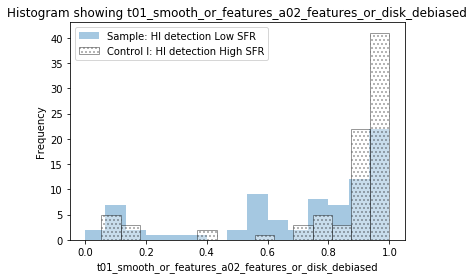

KstestResult(statistic=0.3161764705882353, pvalue=0.0003655153491770591)
----------------------------------------------------------------------------------------------------
Matched: 80 out of 97
Matched: 90 out of 97


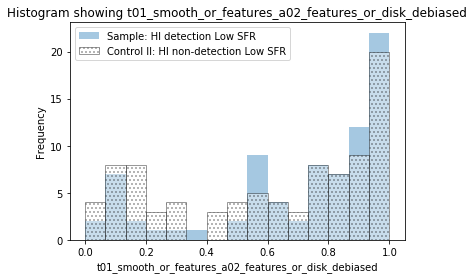

KstestResult(statistic=0.17777777777777778, pvalue=0.11975993357088754)


In [13]:
histograms("t01_smooth_or_features_a02_features_or_disk_debiased", t01_a02)